In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.models import load_model


In [2]:
# Đường dẫn đến mô hình đã huấn luyện
model_path = 'D:/HUS_22001541/PPNCKH/TrafficSign_Recognition/output/traffic_sign_model_trained_final.h5'

In [3]:
# Tải mô hình
model = load_model(model_path)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 activation (Activation)     (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                             

In [5]:
# Định nghĩa labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
# Đường dẫn thư mục chứa ảnh test
test_images_path = 'D:/HUS_22001541/PPNCKH/TrafficSign_Recognition/input/Test'
image_files = os.listdir(test_images_path)

In [7]:
# Chọn ngẫu nhiên 10 ảnh
random_images = random.sample(image_files, 10)

In [8]:
# Tiền xử lý ảnh
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(30, 30))  # Điều chỉnh kích thước ảnh về 32x32
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Chuẩn hóa giá trị pixel về khoảng [0,1]
    return img_array

1/1 [==============================] - 0s 29ms/step


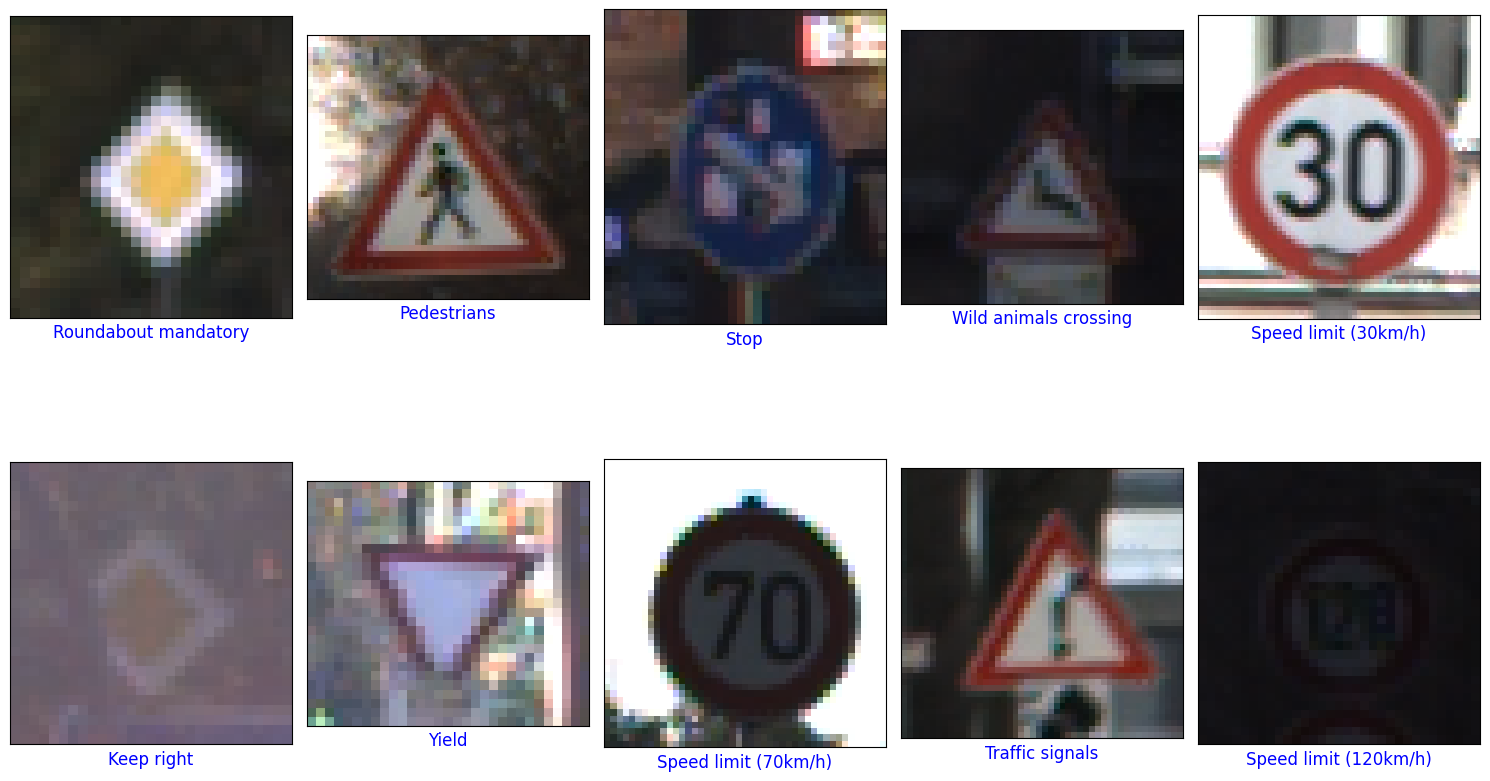

In [9]:
# Dự đoán
predictions = []
X_test = []
for img_file in random_images:
    img_path = os.path.join(test_images_path, img_file)
    img_array = preprocess_image(img_path)
    X_test.append(image.load_img(img_path))
    pred = np.argmax(model.predict(img_array))  # Lấy class có xác suất cao nhất
    predictions.append(pred)

# Hiển thị kết quả
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred_label = classes[predictions[i]]
    plt.xlabel(pred_label, color='blue', fontsize=12)
    plt.imshow(X_test[i])
plt.tight_layout()
plt.show()